<a href="https://colab.research.google.com/github/tianyueniu/mouse_movement_personality/blob/master/Mouse_movement_%26_Personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Personality Data Preprocessing
Step 1: Read personality data from recorded files. Removed unecessary columns; extract gender & age.  
Step 2: Removed problematic rows (e.g. dropped a few missing values, dropped a few incorrect entries).   
Step 3: Normalized big 5 personality scores, checked personality score distribution for each trait.    
Step 4: Checked personality score distribution by age and gender.


*For privacy reasons, Step 1, 2, 3 are not shown here. True worker IDs and related information were replaced with pseudo ids after step 3. Date of study was also changed to '2020-01-01' for all participants. The result csv file is read here to perform further analysis.*


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import json
import numpy as np

In [156]:
#read in cleaned file from github
df = pd.read_csv('https://raw.githubusercontent.com/tianyueniu/mouse_movement_personality/master/study12pilots_personality_id_cleaned.csv')

In [157]:
df.head(5)

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,BirthYear,Gender,Study,Age,workerID,perfKey,testSeq,date
0,37,39,35,8,33,1987,Male,pilot1_1,33,A4312149555,y6432,780991,200101
1,34,39,35,11,31,1960,Male,pilot1_1,60,A7633512918,y641103,214431,200101
2,30,37,32,10,27,1968,Female,pilot1_1,52,A2518688120,y290160,331215,200101
3,8,33,35,15,11,1977,Female,pilot1_1,43,A6155262656,y614964,921819,200101
4,19,27,27,22,18,1988,Female,pilot1_1,32,A5599638067,y179274,593553,200101


In [158]:
df.Study.value_counts()

study01     123
study02     121
pilot1_5     61
pilot1_1     61
pilot2_2     61
pilot1_6     60
pilot1_8     59
pilot1_2     59
pilot1_4     58
pilot1_3     57
pilot1_7     56
pilot2_1     55
Name: Study, dtype: int64

There are multiple studies here. Each asks the participants to rate the street images they see based on a different criteria (e.g. transparency, complexity, etc). Below is a dictionary matching each study with its criterion:

In [17]:
description = {"study01":"like", 
               "study02":"dislike", 
               "pilot1_1":"preference", 
               "pilot1_2":"walkability", 
               "pilot1_3":"imageability",
               "pilot1_4":'complexity',
               "pilot1_5":'enclosure',
               "pilot1_6":'humanscale1', 
               "pilot1_7":"transparency", 
               "pilot1_8":"order1", 
               "pilot2_1":"humanscale2", 
               'pilot2_2':'order2'}

Each study has a separate folder of participant's mouse tracking json files.

In [159]:
#normalize personality scores
df['Extraversion_N'] = df['Extraversion'].astype(float)/8
df['Agreeableness_N'] = df['Agreeableness'].astype(float)/9
df['Conscientiousness_N'] = df['Conscientiousness'].astype(float)/9
df['Neuroticism_N'] = df['Neuroticism'].astype(float)/8
df['Openness_N'] = df['Openness'].astype(float)/10

In [160]:
#check mean personality score
df.mean().tail(5)

Extraversion_N         2.832130
Agreeableness_N        3.754513
Conscientiousness_N    3.905335
Neuroticism_N          2.527076
Openness_N             3.608424
dtype: float64

In [161]:
#check var personality score
df.var().tail(5)

Extraversion_N         0.930709
Agreeableness_N        0.542132
Conscientiousness_N    0.594419
Neuroticism_N          0.920840
Openness_N             0.596122
dtype: float64

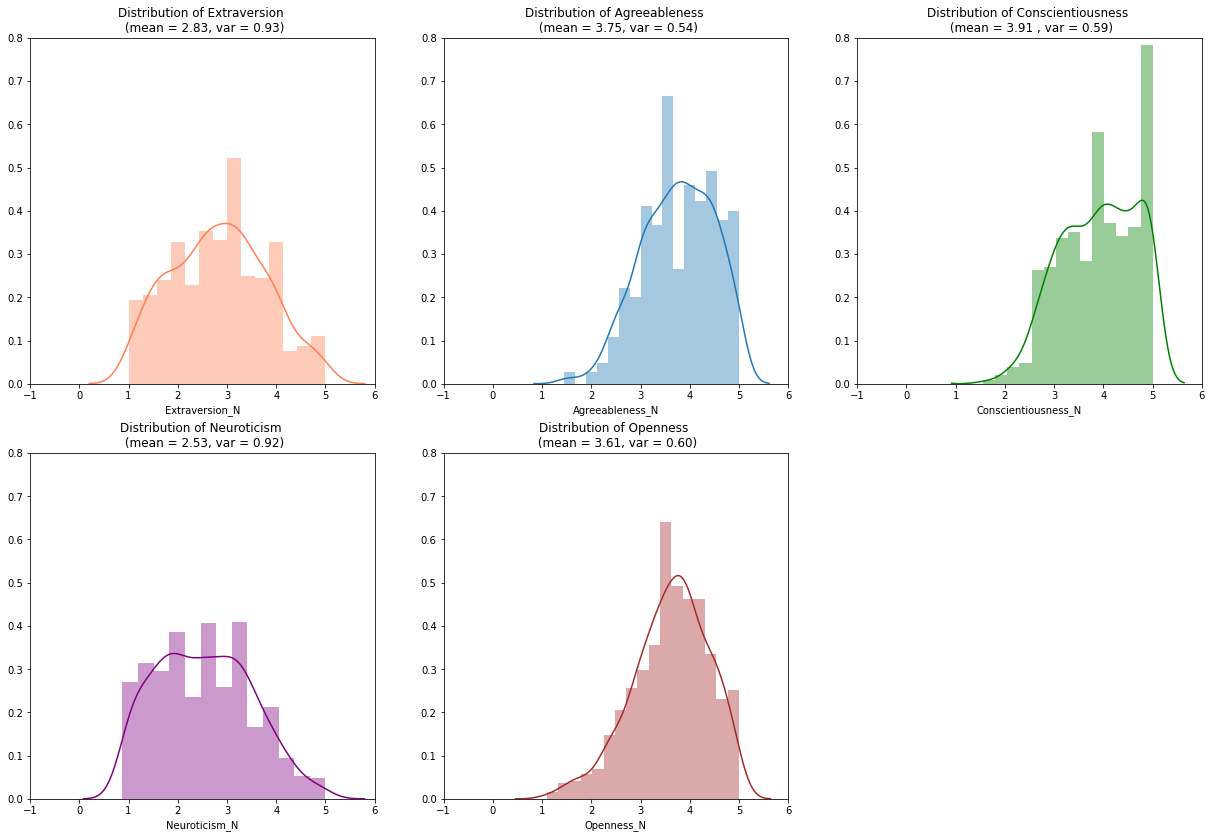

In [162]:
#plot normalized personality scores
plt.figure(figsize=(21,14))
plt.subplot(2,3,1)
sb.distplot(df['Extraversion_N'], color='coral')
plt.xlim(-1, 6)
plt.ylim(0,0.8)
plt.title('Distribution of Extraversion \n (mean = 2.83, var = 0.93)')
plt.subplot(2,3,2)
sb.distplot(df['Agreeableness_N'])
plt.xlim(-1, 6)
plt.ylim(0,0.8)
plt.title('Distribution of Agreeableness \n (mean = 3.75, var = 0.54)')
plt.subplot(2,3,3)
sb.distplot(df['Conscientiousness_N'], color='green')
plt.xlim(-1, 6)
plt.ylim(0,0.8)
plt.title('Distribution of Conscientiousness \n (mean = 3.91 , var = 0.59)')
plt.subplot(2,3,4)
sb.distplot(df['Neuroticism_N'], color='purple')
plt.xlim(-1, 6)
plt.ylim(0,0.8)
plt.title('Distribution of Neuroticism \n (mean = 2.53, var = 0.92)')
plt.subplot(2,3,5)
sb.distplot(df['Openness_N'], color='brown')
plt.xlim(-1, 6)
plt.ylim(0,0.8)
plt.title('Distribution of Openness \n (mean = 3.61, var = 0.60)');

Conscientiousness, Openness and Agreeableness are right skewed. Neuroticism is slighly left skewed, and extraversion is approximately evenly distributed. These distributions are validated by  the general population distribution shown in other literatures.

*John, O. P., & Srivastava, S. (1999). The Big-Five trait taxonomy: History, measurement, and theoretical perspectives. In L. A. Pervin & O. P. John (Eds.), Handbook of personality: Theory and research (Vol. 2, pp. 102–138). New York: Guilford Press.*




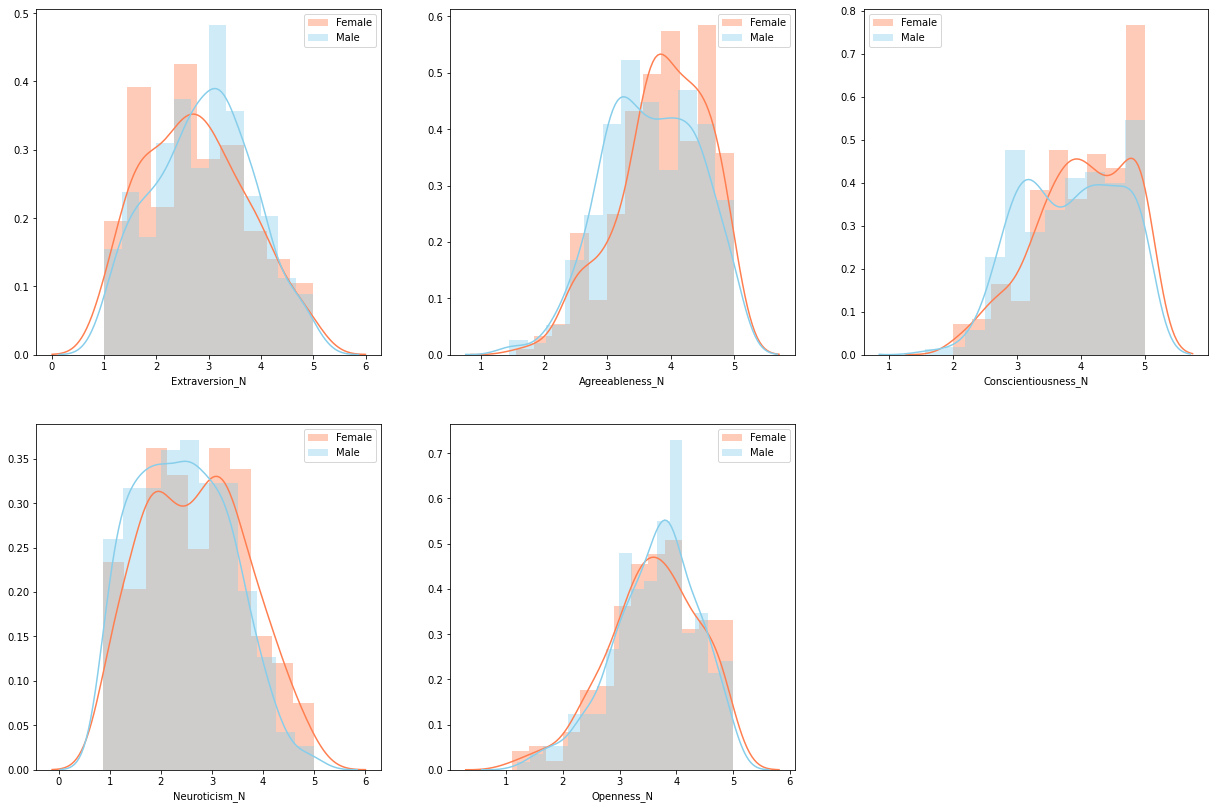

In [8]:
#examine personality distribution by gender
male = df[df.Gender=="Male"]
female = df[df.Gender=="Female"]
other = df[df.Gender=="Other"]

#plot normalized personality scores
plt.figure(figsize=(21,14))
plt.subplot(2,3,1)
sb.distplot(female['Extraversion_N'], color='coral', label='Female')
sb.distplot(male['Extraversion_N'], color='skyblue', label='Male')
plt.legend()
plt.subplot(2,3,2)
sb.distplot(female['Agreeableness_N'], color='coral', label='Female')
sb.distplot(male['Agreeableness_N'], color='skyblue', label='Male')
plt.legend()
plt.subplot(2,3,3)
sb.distplot(female['Conscientiousness_N'], color='coral', label='Female')
sb.distplot(male['Conscientiousness_N'], color='skyblue', label='Male')
plt.legend()
plt.subplot(2,3,4)
sb.distplot(female['Neuroticism_N'], color='coral', label='Female')
sb.distplot(male['Neuroticism_N'], color='skyblue', label='Male')
plt.legend()
plt.subplot(2,3,5)
sb.distplot(female['Openness_N'], color='coral', label='Female')
sb.distplot(male['Openness_N'], color='skyblue', label='Male')
plt.legend();

Extraversion: male mean higher   
Agreeableness: female mean higher  
Conscientiousness: female mean higher  
Neuroticism: female slightly higher  
Openness: similar

These distributions are again supported by literature.

*Costa, P. T., Terracciano, A., & Mccrae, R. R. (2001). Gender differences in personality traits across cultures: Robust and surprising findings. Journal of Personality and Social Psychology, 81(2), 322–331. doi: 10.1037/0022-3514.81.2.322*

## Linking Mouse Tracking Data with Personality Data

This part of the notebook links each participant's mouse tracking files with their demographic data and process the mouse tracking files (jsons).

In [163]:
#define a function to create a list of json_keys to link personality data with mouse tracking data

def process_data(df, study):
    #find the given study
    new = df[df['Study'] == study].copy().reset_index(drop=True)
    #set test sequence and date to str
    new['testSeq'] = new['testSeq'].astype('str')
    new['date'] = new['date'].astype('str')
    #create a column for json key (= mouse movement json file name)
    new['json_key'] = new.testSeq+"_"+new.workerID+"_"+new.date
    #create a list 'keys' to store study 1 participants' json file names
    keys = list(new['json_key'])
    return new, keys

As described in the previous section, multiple studies are included in the analysis. In each different study, participants are asked to choose four images based on a different criterion (e.g. imageability, walkability, enclosure, etc). Each study has a separate folder of participants mouse tracking files. Each participant's mouse tracking data is recorded in a json file.

In [165]:
#now let's create a separate dataframe for study1
study1, keys_study1 = process_data(df,'study01')

In [166]:
study1.head(3)

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,BirthYear,Gender,Study,Age,workerID,perfKey,testSeq,date,Extraversion_N,Agreeableness_N,Conscientiousness_N,Neuroticism_N,Openness_N,json_key
0,20,33,40,34,48,1975,Female,study01,45,A8669779439,y697737,381343,200101,2.500,3.666667,4.444444,4.250,4.8,381343_A8669779439_200101
1,31,44,43,10,43,1991,Male,study01,29,A4250829844,y66148,503860,200101,3.875,4.888889,4.777778,1.250,4.3,503860_A4250829844_200101
2,13,31,21,35,37,1962,Male,study01,58,A2737429901,y590340,425935,200101,1.625,3.444444,2.333333,4.375,3.7,425935_A2737429901_200101


To walk through the process, json files for the above three participants have been manually processed and uploaded to github here: https://github.com/tianyueniu/mouse_movement_personality/tree/master/sample_mouse_data.   

In [167]:
def plot_one_participant(jsonfile):

    #loop through the json to see which ones are true trials, which ones are not true trials
    #create a dictionary containing two lists of attention trial indices and normal trials indices
    trial_index = {"attention":[], 'normal':[]}
    for i in range(len(jsonfile)):
        if jsonfile[i].get('image_array') is not None:
            if len(jsonfile[i]['attention_check'])!=0:
                trial_index['attention'].append(i)
            else:
                trial_index['normal'].append(i)

    #define a function to loop through a list of indices given and plot mouse movement patterns
    def plot_movements(indices, text):
        count = 0
        for i in indices:
            count +=1
            mouse = pd.DataFrame(jsonfile[i]['mouse_track'], columns=['timestamp', 'x', 'y', 'click'])
            fig = plt.figure(figsize=(18,5))
            plt.subplot(1,3,1)
            sb.scatterplot(x='x',y='y', data=mouse, hue='click', style='click',
                           x_jitter=0.2, y_jitter=0.2, legend=False,
                           palette=['orange','blue'], size = mouse['click']*150)
            plt.title('Overall Mouse Movement')
            plt.subplot(1,3,2)
            sb.lineplot(x='timestamp',y='x', data=mouse)
            plt.title('Movement on X-axis');
            plt.subplot(1,3,3)
            sb.lineplot(x='timestamp',y='y', data=mouse)
            plt.title('Movement on Y-axis')
            fig.suptitle(text.format(count))

    #check first five attention trials mouse movement
    plot_movements(trial_index['attention'][:5], 'ATTENTION TRIAL (head) {}')
    #check last five attention trials mouse movement
    plot_movements(trial_index['attention'][-5:], 'ATTENTION TRIAL (tail) {}')
    #check first five normal trials mouse movement
    plot_movements(trial_index['normal'][:5], 'NORMAL TRIAL (head) {}')
    #check last five normal trials mouse movement
    plot_movements(trial_index['normal'][-5:], 'NORMAL TRIAL (tail) {}')
    
    return

In [168]:
#get json file from github
#NOTE: only keys_study[0], keys_study[1] and keys_study[2] can be found in github
#these data are manually processed; private information is removed from these data
url = 'https://raw.githubusercontent.com/tianyueniu/mouse_movement_personality/master/sample_mouse_data/{}.json'.format(keys_study1[0])
resp = requests.get(url)
data = json.loads(resp.text)

In [169]:
data[1] #sbj_id and task_id are removed for privacy reasons

{'exp_stage': 'fire_instructions_page',
 'internal_node_id': '0.0-1.0',
 'rt': 56296,
 'sbj_id': '',
 'task_id': '',
 'time_elapsed': 65167,
 'trial_index': 1,
 'trial_type': 'instructions',
 'view_history': '[{"page_index":0,"viewing_time":15939},{"page_index":1,"viewing_time":11181},{"page_index":2,"viewing_time":5400},{"page_index":3,"viewing_time":5540},{"page_index":4,"viewing_time":3688},{"page_index":5,"viewing_time":5578},{"page_index":6,"viewing_time":3899},{"page_index":7,"viewing_time":2686},{"page_index":8,"viewing_time":2384}]'}

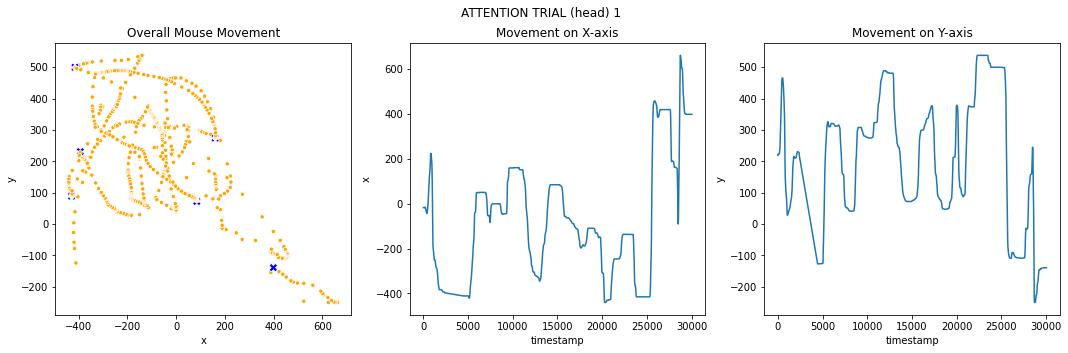

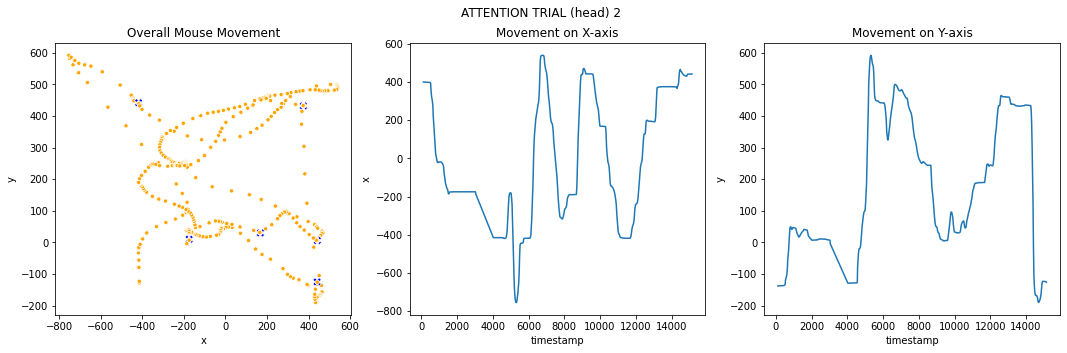

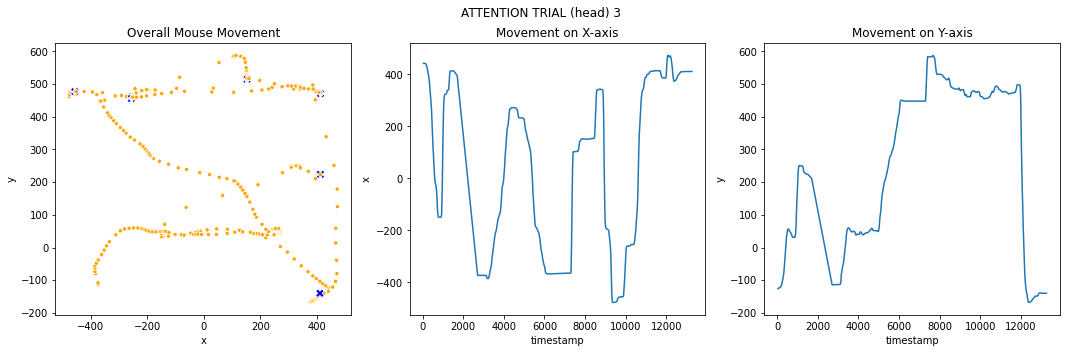

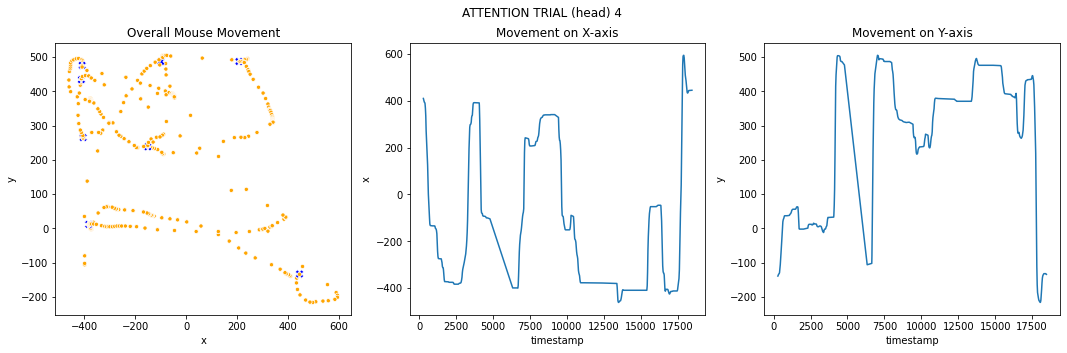

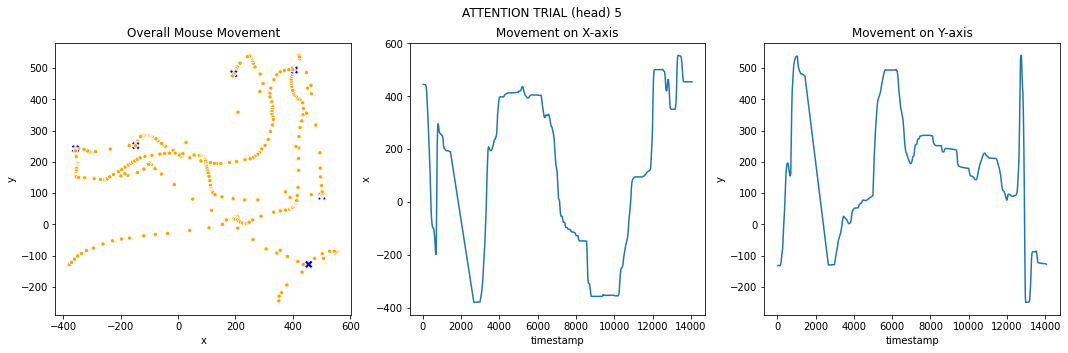

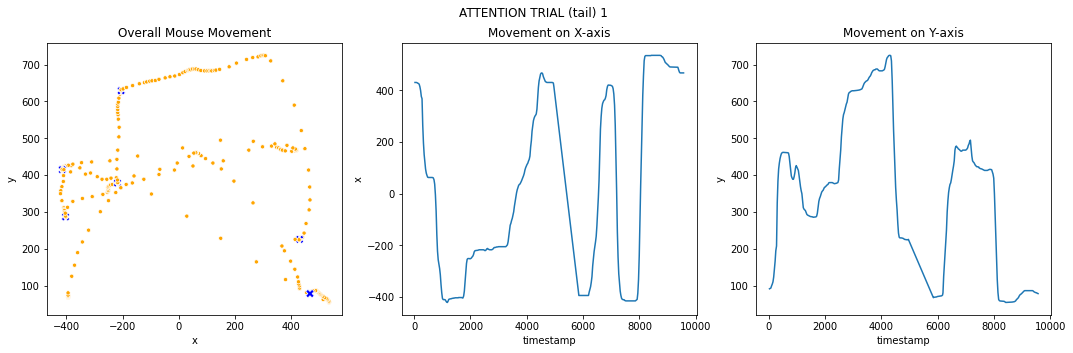

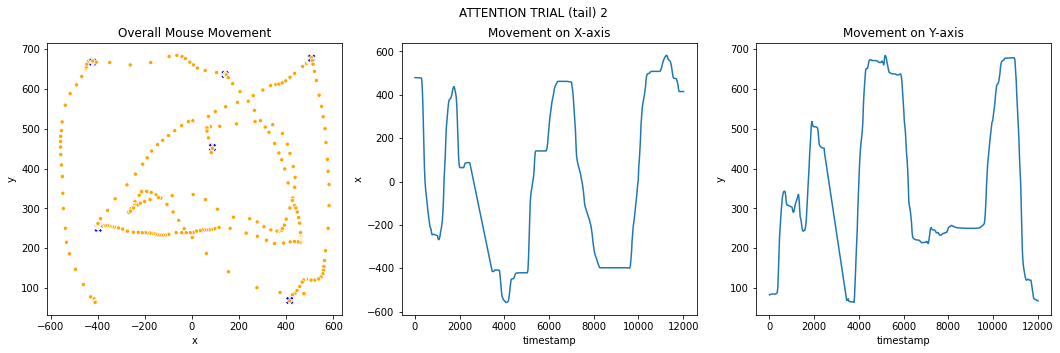

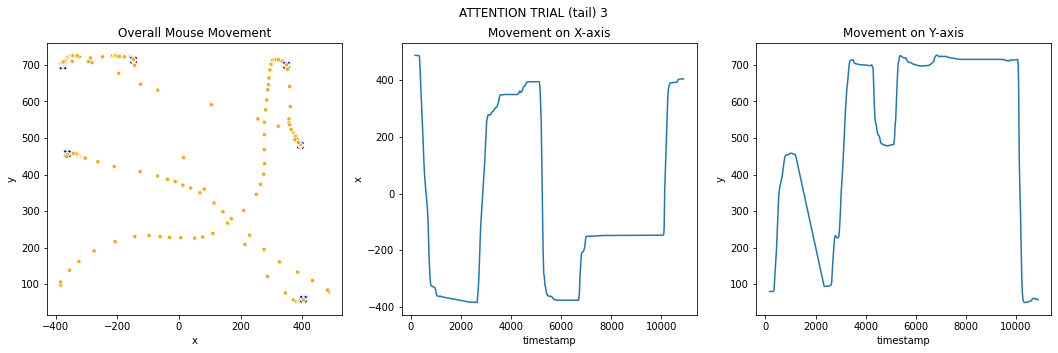

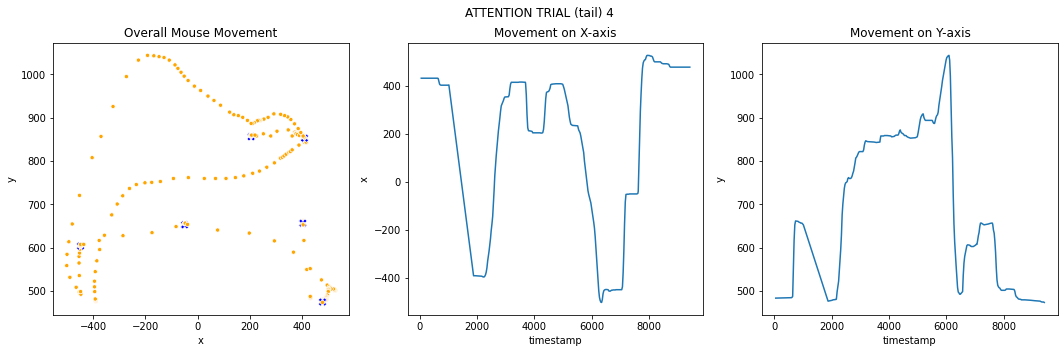

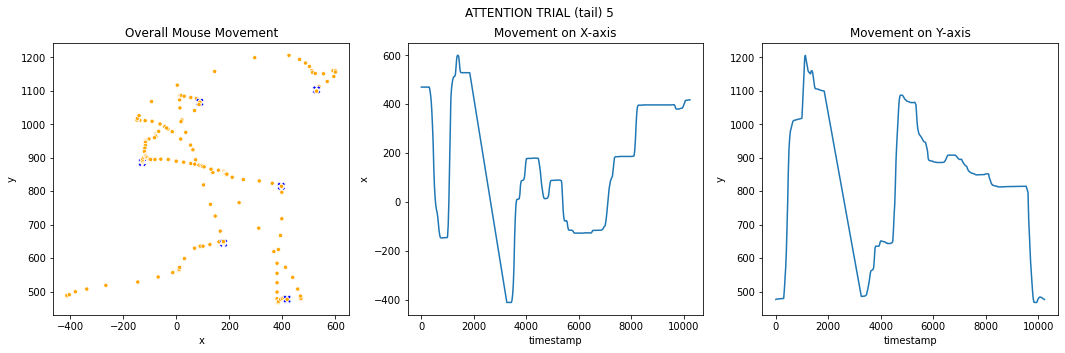

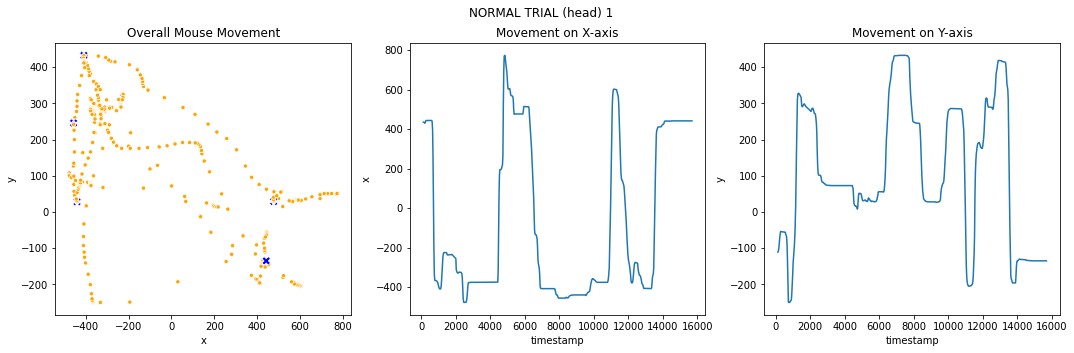

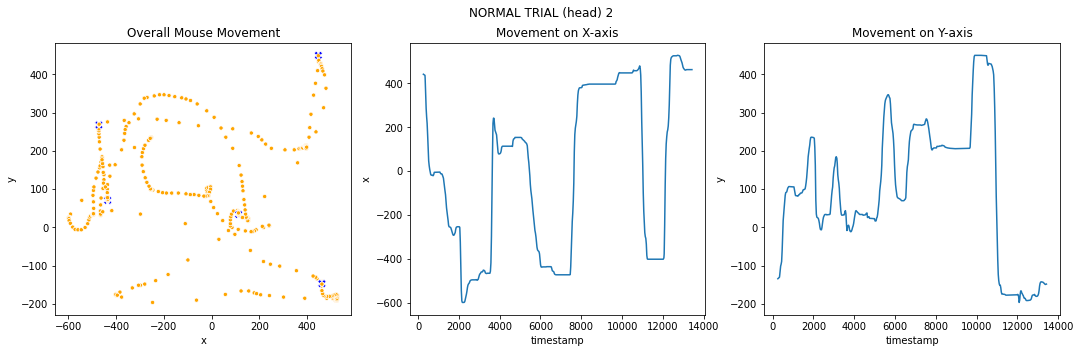

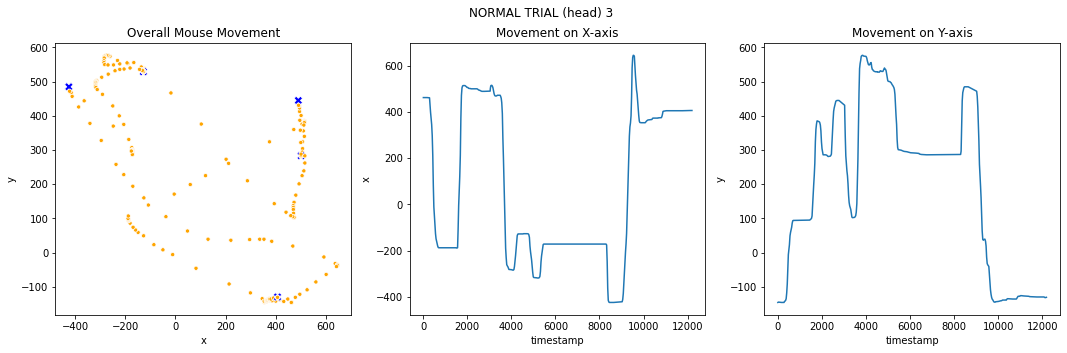

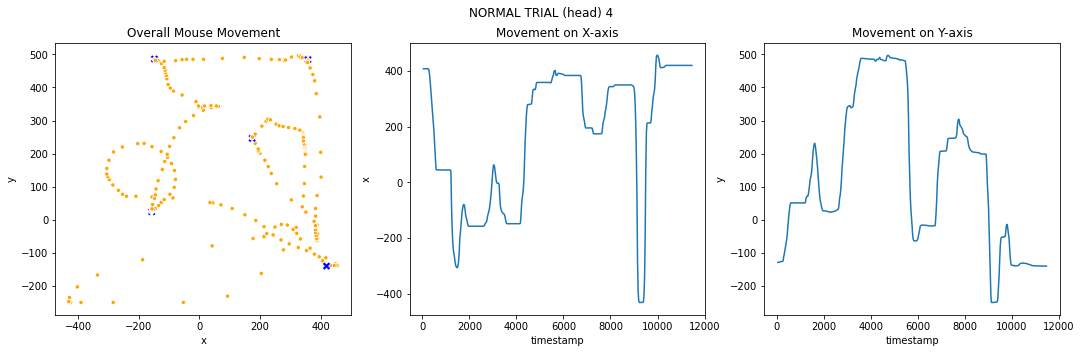

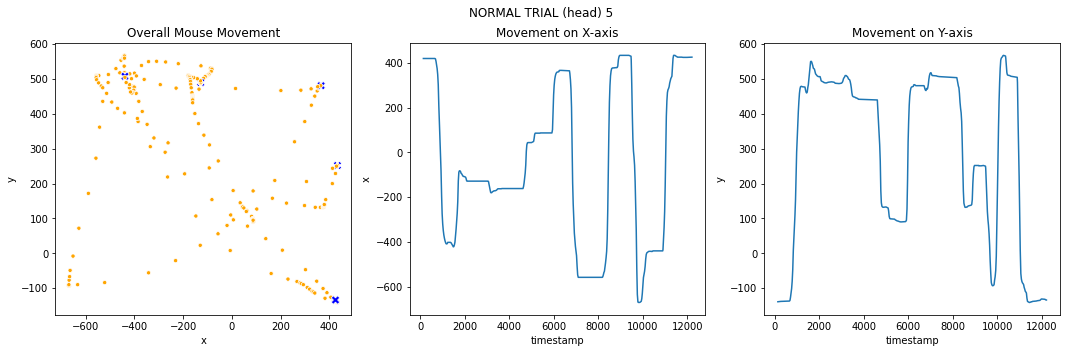

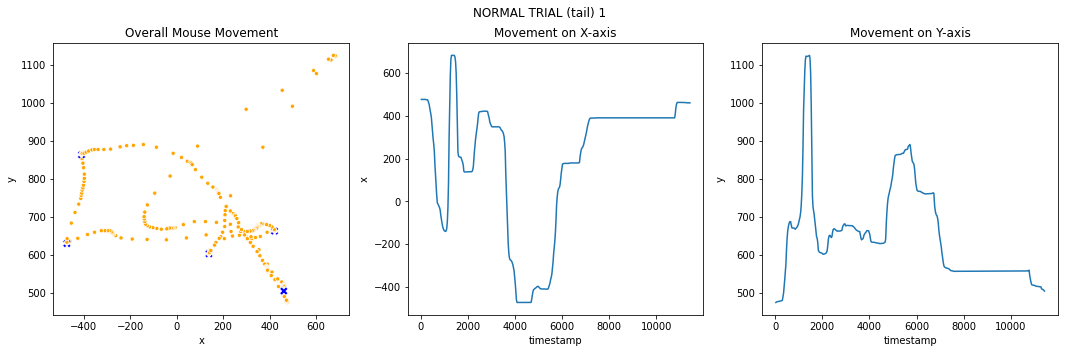

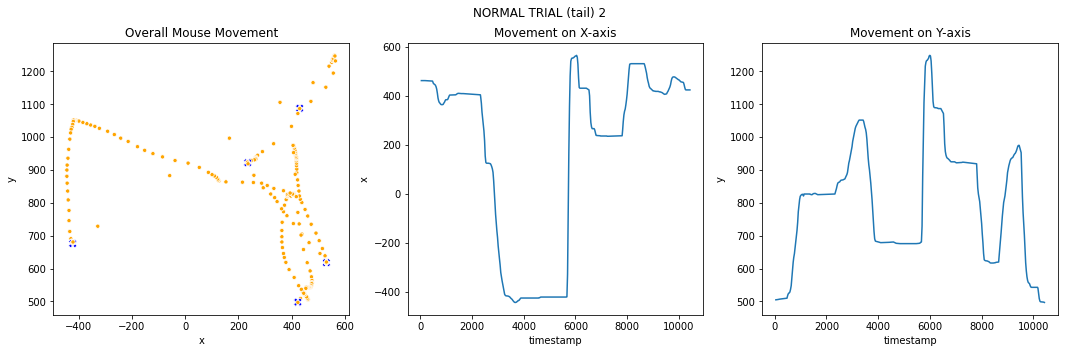

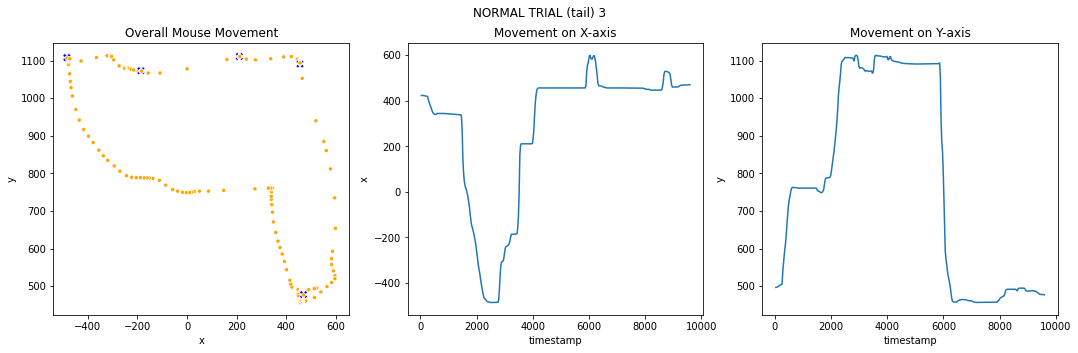

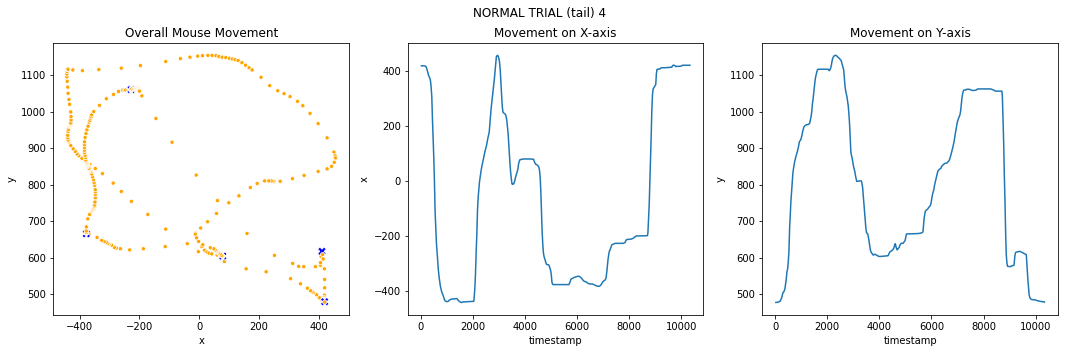

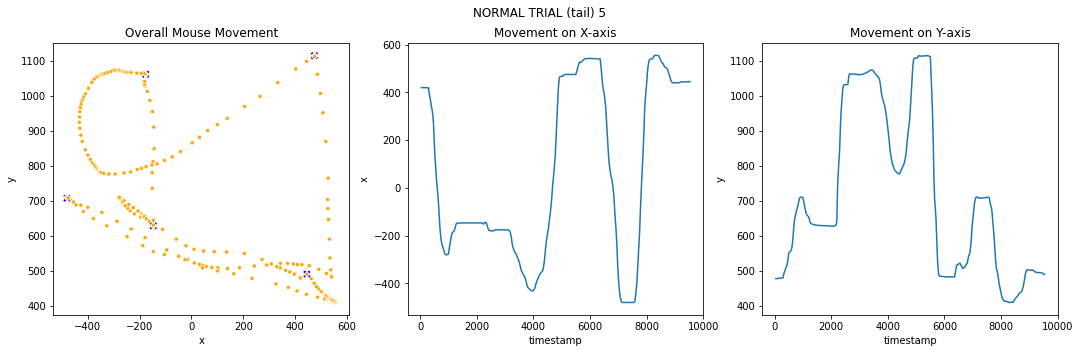

In [170]:
#plot that participant's mouse movement patterns
plot_one_participant(data)

## Extract Mouse Movement Features
This part of the notebook defines functions to extract click and other movement patterns from participants' mouse tracking data.

We will again be using the three sample data from study1 to walk through the process.

In [171]:
#create our mini df including only the three sample data
study1_sample_df = study1[:3].copy().reset_index(drop=True)

In [172]:
study1_sample_df

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,BirthYear,Gender,Study,Age,workerID,perfKey,testSeq,date,Extraversion_N,Agreeableness_N,Conscientiousness_N,Neuroticism_N,Openness_N,json_key
0,20,33,40,34,48,1975,Female,study01,45,A8669779439,y697737,381343,200101,2.500,3.666667,4.444444,4.250,4.8,381343_A8669779439_200101
1,31,44,43,10,43,1991,Male,study01,29,A4250829844,y66148,503860,200101,3.875,4.888889,4.777778,1.250,4.3,503860_A4250829844_200101
2,13,31,21,35,37,1962,Male,study01,58,A2737429901,y590340,425935,200101,1.625,3.444444,2.333333,4.375,3.7,425935_A2737429901_200101


In [173]:
study1_sample_keys = keys_study1[:3]
study1_sample_keys #these are pseudo keys

['381343_A8669779439_200101',
 '503860_A4250829844_200101',
 '425935_A2737429901_200101']

In [174]:
#find number of clicks

def find_clicks(keys): 
    #this function return average clicks per trial & proportion of trials in 
    #which participants performed extra clicks than necessary 
    #in both attention and normal trials

    clicks_final = []
    
    for i in range(len(keys)):
    #for each participant in the data
        url = 'https://raw.githubusercontent.com/tianyueniu/mouse_movement_personality/master/sample_mouse_data/{}.json'.format(keys[i])
        resp = requests.get(url)
        test = json.loads(resp.text)

        res = {"attention_click":[], 'attention_trial_count':0, 'attention_reclick':0, 
               'normal_click':[], 'normal_trial_count':0, 'normal_reclick':0}
        
        for i in range(len(test)):
        #for each trial completed by the participant
            
            if test[i].get('image_array') is not None:
            #if this is a mouse tracking trial
                if len(test[i]['attention_check'])!=0:
                #if this is an attention trial
                    res['attention_trial_count']+=1 #count number of attention trials
                    clicks = np.sum(test[i]['mouse_track'], axis=0)[3] #count num clicks
                    if clicks > 6: 
                        res['attention_reclick']+=1 #count reclick
                    res['attention_click'].append(clicks) 
                else:
                #if this is a normal trial
                    res['normal_trial_count']+=1
                    clicks = np.sum(test[i]['mouse_track'], axis=0)[3]
                    if clicks > 5:
                        res['normal_reclick']+=1
                    res['normal_click'].append(clicks) 
                    
        avg_click_attention = sum(res['attention_click'])/len(res['attention_click']) #avg click per trial
        reclick_percent_att = res['attention_reclick']/res['attention_trial_count'] # proportion of trials with reclick
        avg_click_normal = sum(res['normal_click'])/len(res['normal_click'])
        reclick_percent_normal = res['normal_reclick']/res['normal_trial_count']
        
        clicks_final.append([avg_click_attention,reclick_percent_att, 
                             avg_click_normal, reclick_percent_normal])
    
    return clicks_final     

We are measuring reclicks because some participants make changes to their selections in the same trial. This would result in more clicks than necessary per trial and might be reflective of their personalities.

To elaborate, in order for participants to complete the task, they would have to click 5 times in normal trials (4 selection clicks and 1 click on the ‘next’ button), and 6 times in attention check trials (4 selection clicks, 1 drag click, and 1 click on the ‘next’ button). The percent of trials in which a participant made more clicks than necessary was therefore calculated to quantify 'reconsideration' or 'impatience'. The percents of reconsideration were calculated separately for attention trials and normal trials because the majority of the attention trials are located at the beginning of the task, and so participants might be clicking more in attention trials for exploration, whereas clicking more in normal trials are more reflective of 'reconsideration' or 'impatience'.

In [175]:
#extract movement features such as distance and speed

def find_movement(keys):   

    #this function returns return average x distance travelled (guiding pattern), 
    #average euclidean distance travelled, average speed, 
    #and average completion time across trials

    final = []
    
    for k in range(len(keys)):
    #for each participant in the data
        url = 'https://raw.githubusercontent.com/tianyueniu/mouse_movement_personality/master/sample_mouse_data/{}.json'.format(keys[k])
        resp = requests.get(url)
        test = json.loads(resp.text)

        distance_x_total = [] #a list of distance x moved per trial
        speed_total = [] #a list of euclidean speed per trial
        euclidean_total = [] # a list of euclidean distance moved per trial
        time_total = [] #a list of trial completion time
        
        for i in range(len(test)):
        #for each trial
            if test[i].get('image_array') is not None:
            #if this is a valid mouse tracking trial
                prev_x = None
                prev_y = None
                distance_x = 0
                euclidean = 0
                for move in test[i]['mouse_track']:
                    if prev_x!= None:
                        distance_x += abs(move[1]-prev_x)
                        euclidean += abs(((move[1]-prev_x)**2+(move[2]-prev_y)**2)**(1/2))
                        prev_x = move[1]
                        prev_y = move[2]
                    else:
                        prev_x = move[1]
                        prev_y = move[2]
                time = test[i]['mouse_track'][-1][0] - test[i]['mouse_track'][0][0]
                distance_x_total.append(distance_x)
                euclidean_total.append(euclidean)
                speed_total.append(euclidean/time)
                time_total.append(time)
                
        final.append([sum(distance_x_total)/len(distance_x_total), #avg x distance per trial
                     sum(euclidean_total)/len(euclidean_total), #avg euclidean distance per trial
                     sum(speed_total)/len(speed_total), #avg speed 
                     sum(time_total)/len(time_total)]) #avg completion time
    
    return final 

In [176]:
 #Find long pauses (may be an indicator for inattention)

def find_pause(keys):   
    #this function returns sum of long pauses per participant across all trials
    
    final = []
    
    for k in range(len(keys)):
    #for each participant in the data
    
        url = 'https://raw.githubusercontent.com/tianyueniu/mouse_movement_personality/master/sample_mouse_data/{}.json'.format(keys[k])
        resp = requests.get(url)
        test = json.loads(resp.text)
            
        long_pause_per_trial = [] #count of long pause across all trials
        
        for i in range(len(test)):
        #for each trial
            if test[i].get('image_array') is not None:
            #if this is a valid mouse tracking trial
                long_pause = 0 #long pause per trial
                pause_time = [] #a list of pause periods per trial
                prev_time = None
                for move in test[i]['mouse_track']:
                    #for each movement
                    if prev_time != None:
                        current_time = move[0]
                        pause = current_time - prev_time 
                        if pause >= 4000: # >4 seconds = long pause; defined by literature
                            long_pause+=1
                        prev_time = move[0]
                    else:
                        prev_time = move[0]
                        
                long_pause_per_trial.append(long_pause)
        
        final.append(sum(long_pause_per_trial)) #or just append long_pause_per_trial
        
    return final

In [177]:
# Use the above functions to extract information from our sample data
print(study1_sample_df)
print(study1_sample_keys)

   Extraversion  Agreeableness  ...  Openness_N                   json_key
0            20             33  ...         4.8  381343_A8669779439_200101
1            31             44  ...         4.3  503860_A4250829844_200101
2            13             31  ...         3.7  425935_A2737429901_200101

[3 rows x 19 columns]
['381343_A8669779439_200101', '503860_A4250829844_200101', '425935_A2737429901_200101']


In [178]:
def find_patterns (df, keys):
    #find patterns
    df_clicks = find_clicks(keys) 
    df_movement = find_movement(keys)
    df_pause = find_pause(keys)

    #convert to pandas dataframe
    clicks_1 = pd.DataFrame(df_clicks,columns=['avg_click_att', 'reclick_percent_att', 'avg_click_norm','reclick_percent_norm'])
    movement_1 = pd.DataFrame(df_movement, columns=['avg_x_dist', 'avg_euc_dist', 'avg_euc_speed', 'avg_completion_time'])
    pause_1 = pd.DataFrame(df_pause, columns = ['total_pause_cnt'])

    #create new dataframe, merging everything together
    df_new = pd.concat([df, clicks_1, movement_1, pause_1], axis=1)
    
    return df_new

In [179]:
study1_sample_df_new = find_patterns(study1_sample_df, study1_sample_keys)

In [180]:
study1_sample_df_new

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,BirthYear,Gender,Study,Age,workerID,perfKey,testSeq,date,Extraversion_N,Agreeableness_N,Conscientiousness_N,Neuroticism_N,Openness_N,json_key,avg_click_att,reclick_percent_att,avg_click_norm,reclick_percent_norm,avg_x_dist,avg_euc_dist,avg_euc_speed,avg_completion_time,total_pause_cnt
0,20,33,40,34,48,1975,Female,study01,45,A8669779439,y697737,381343,200101,2.500,3.666667,4.444444,4.250,4.8,381343_A8669779439_200101,6.307692,0.115385,5.520548,0.205479,4607.939394,6144.443128,0.500585,12513.838384,1
1,31,44,43,10,43,1991,Male,study01,29,A4250829844,y66148,503860,200101,3.875,4.888889,4.777778,1.250,4.3,503860_A4250829844_200101,6.846154,0.384615,5.808219,0.342466,5440.823232,7322.577197,0.453366,22252.747475,41
2,13,31,21,35,37,1962,Male,study01,58,A2737429901,y590340,425935,200101,1.625,3.444444,2.333333,4.375,3.7,425935_A2737429901_200101,6.346154,0.269231,5.493151,0.191781,3031.727273,3939.286111,0.226985,17974.494949,45


The exact same steps shown above are used to extract mouse movement features from the rest of the data (participants' mouse tracking json files from study 1, study 2, and  pilot studies). For privacy purposes, the rest of the json files are not shown here. Participants with problematic mouse tracking data were eventaully dropped. After further data cleaning, we were able to get a final table with personality & mouse movement features containing 819 different participants.

## Correlation and Regression Analysis

We use the final table (with personality traits, gender, age, and extracted mouse movement features) for further regression &correlation analysis. For privacy purposes, the table read from github does not include true participant's ID.

In [182]:
df_final = pd.read_csv('https://raw.githubusercontent.com/tianyueniu/mouse_movement_personality/master/personality_mouse_final_table.csv')

In [183]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   819 non-null    int64  
 1   BirthYear             819 non-null    int64  
 2   Gender                819 non-null    object 
 3   Extraversion          819 non-null    int64  
 4   Agreeableness         819 non-null    int64  
 5   Conscientiousness     819 non-null    int64  
 6   Neuroticism           819 non-null    int64  
 7   Openness              819 non-null    int64  
 8   Study                 819 non-null    object 
 9   avg_click_att         819 non-null    float64
 10  reclick_percent_att   819 non-null    float64
 11  avg_click_norm        819 non-null    float64
 12  reclick_percent_norm  819 non-null    float64
 13  avg_x_dist            819 non-null    float64
 14  avg_euc_dist          819 non-null    float64
 15  avg_euc_speed         8

In [185]:
#define a function to plot correlation between a personality trait
#and mouse movement features

def plot_p_corr(df, trait):

    def corrdot(*args, **kwargs):
        corr_r = args[0].corr(args[1], 'pearson')
        corr_text = f"{corr_r:2.2f}".replace("0.", ".")
        ax = plt.gca()
        ax.set_axis_off()
        marker_size = abs(corr_r) * 10000
        ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
                   vmin=-1, vmax=1, transform=ax.transAxes)
        font_size = abs(corr_r) * 40 + 5
        ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                    ha='center', va='center', fontsize=font_size)

    sb.set(style='white', font_scale=1.6)
    df_vars = df[[trait,'avg_click_att','avg_click_norm','avg_x_dist', 
                  'avg_euc_dist', 'avg_euc_speed','avg_completion_time', 
                  'total_pause_cnt']]
    g = sb.PairGrid(df_vars, aspect=1.4, diag_sharey=False)
    g.map_lower(sb.regplot, line_kws={'color': 'black'})
    g.map_diag(sb.distplot, kde_kws={'color': 'black'})
    g.map_upper(corrdot)
    
    return

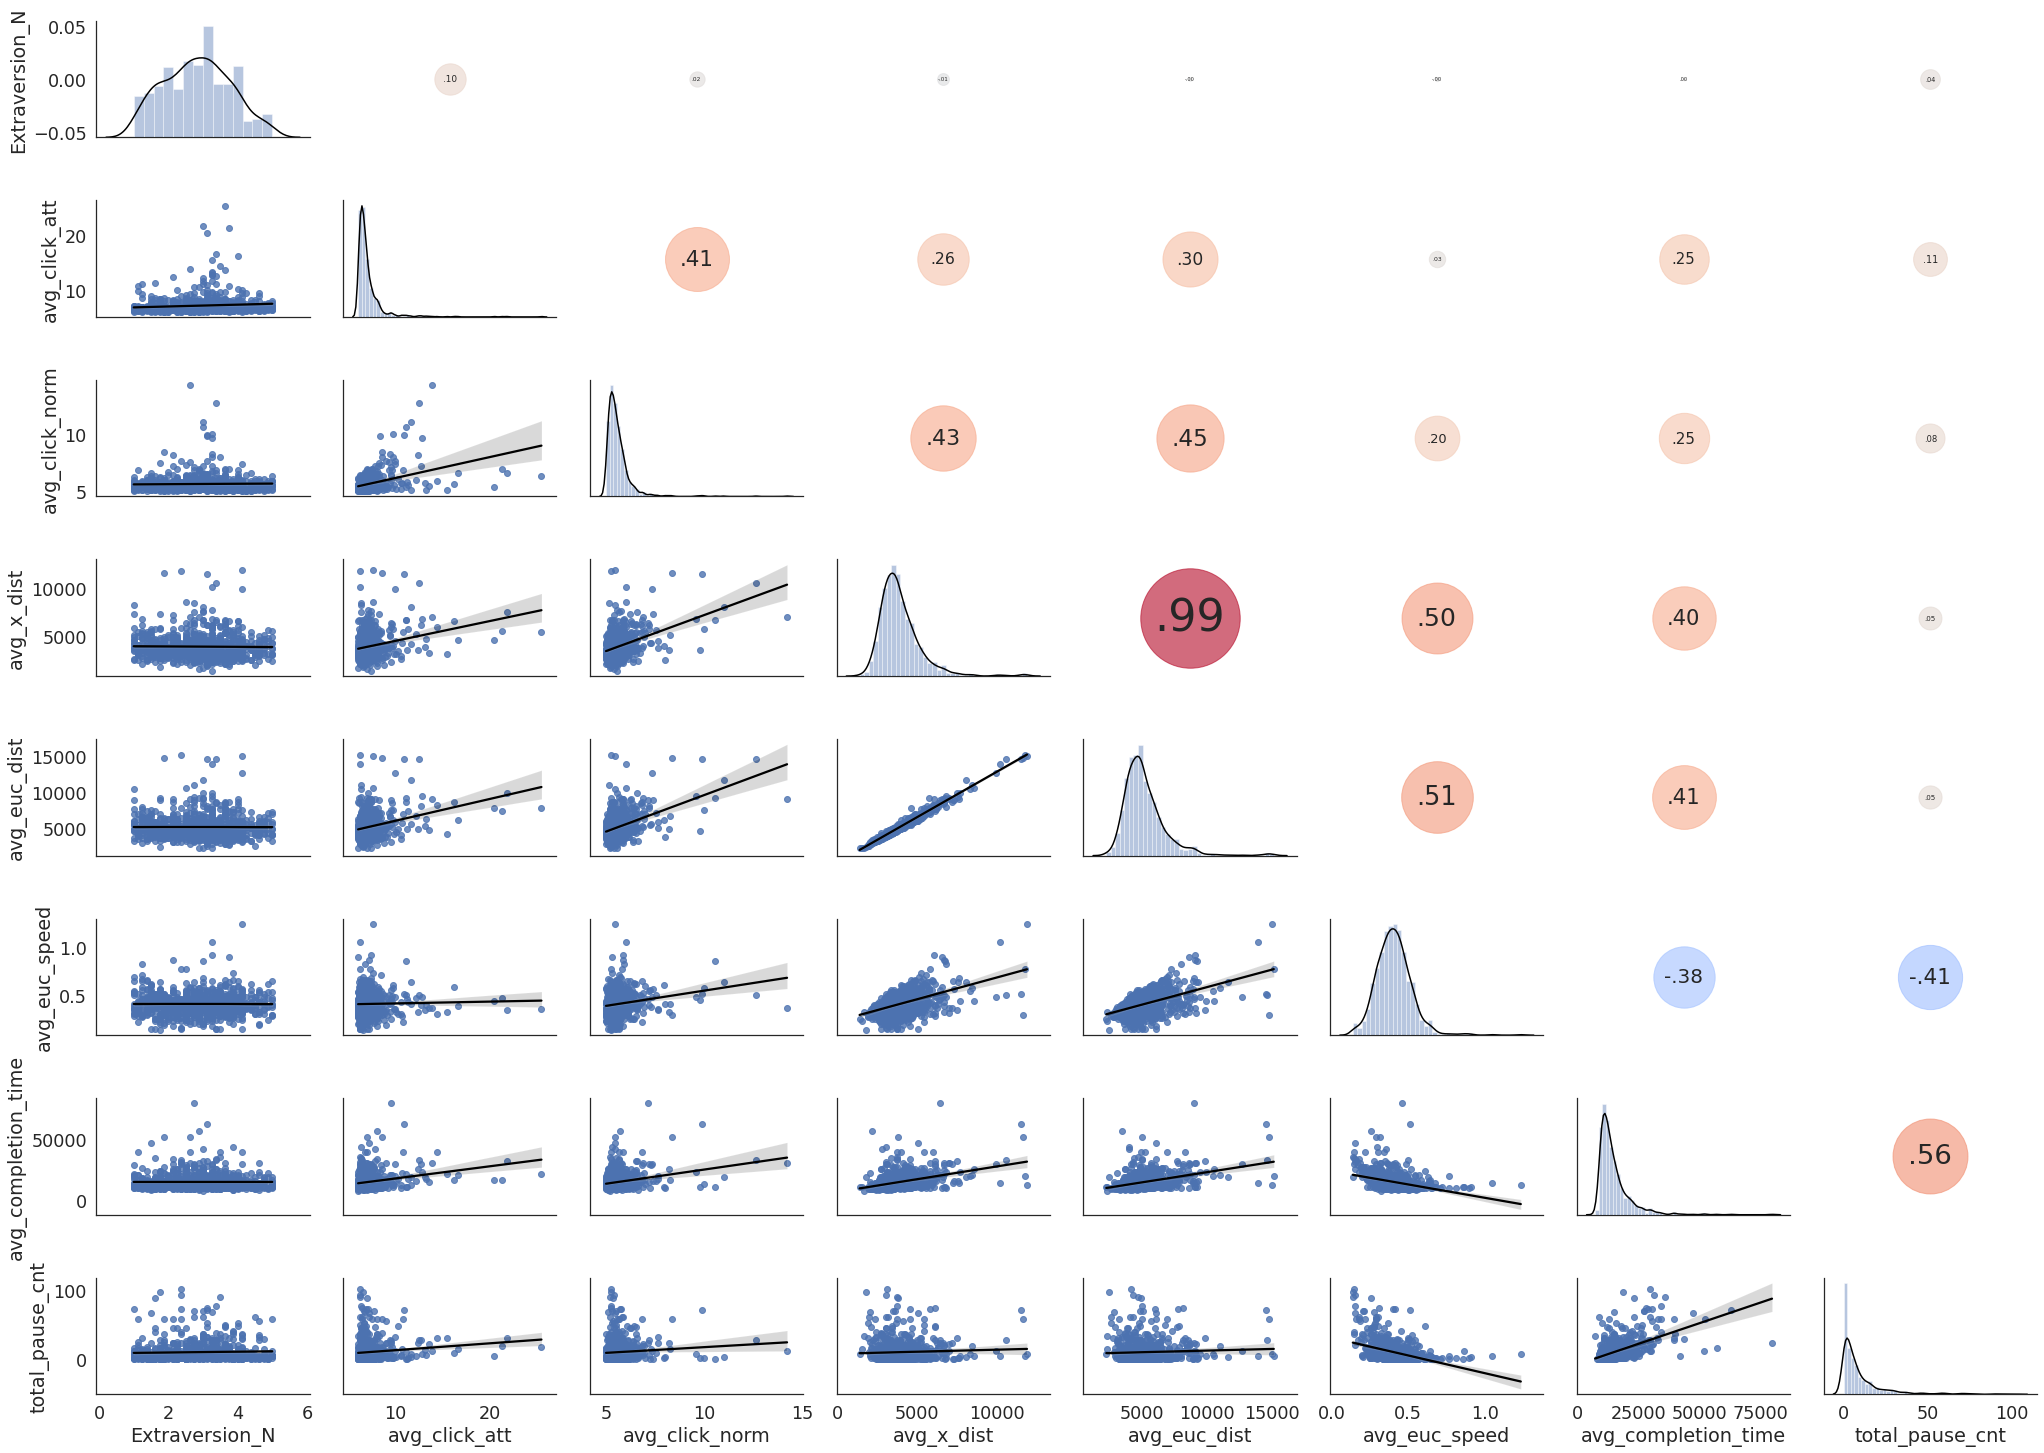

In [191]:
plot_p_corr(df_final, 'Extraversion_N')

In [187]:
big5 = ['Extraversion_N', 'Conscientiousness_N', 'Openness_N','Neuroticism_N', 'Agreeableness_N']
predictors = ['reclick_percent_att','reclick_percent_norm','avg_x_dist','avg_euc_speed','total_pause_cnt']

In [199]:
import scipy #import for pearson correlation
import statsmodels.api as sm #import for linear regression
from scipy import stats #import for t test

In [190]:
#create correlation table for personality traits & predictors
def find_corr_table(data):
    final = {}
    for y in big5:
        final[y] = {}
        for x in predictors:
            res = scipy.stats.pearsonr(data[y], data[x])
            final[y][x]=('corr', round(res[0],3), 'p', round(res[1],3))
    return pd.DataFrame(final)

find_corr_table(df_final)

,Extraversion_N,Conscientiousness_N,Openness_N,Neuroticism_N,Agreeableness_N
reclick_percent_att,"(corr, 0.1, p, 0.004)","(corr, -0.057, p, 0.1)","(corr, -0.085, p, 0.015)","(corr, 0.016, p, 0.654)","(corr, -0.04, p, 0.252)"
reclick_percent_norm,"(corr, 0.033, p, 0.34)","(corr, -0.087, p, 0.013)","(corr, -0.067, p, 0.055)","(corr, 0.028, p, 0.42)","(corr, -0.08, p, 0.021)"
avg_x_dist,"(corr, -0.014, p, 0.688)","(corr, 0.021, p, 0.557)","(corr, 0.034, p, 0.332)","(corr, 0.016, p, 0.652)","(corr, -0.004, p, 0.909)"
avg_euc_speed,"(corr, -0.002, p, 0.96)","(corr, -0.075, p, 0.033)","(corr, -0.043, p, 0.223)","(corr, 0.07, p, 0.045)","(corr, -0.052, p, 0.141)"
total_pause_cnt,"(corr, 0.039, p, 0.266)","(corr, -0.03, p, 0.395)","(corr, -0.005, p, 0.897)","(corr, -0.009, p, 0.801)","(corr, 0.016, p, 0.652)"


In [193]:
#Run Regression Analysis

#define predictors
X = df_final[['reclick_percent_att','reclick_percent_norm', 'avg_x_dist', 'avg_euc_speed','total_pause_cnt']]
X = sm.add_constant(X)

#change response variable 
#Extraversion_N, Openness_N, Neuroticism_N, Agreeableness_N, Conscientiousness_N 
y = df_final['Conscientiousness_N'] 
res = sm.OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Conscientiousness_N   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     4.418
Date:                 Fri, 25 Sep 2020   Prob (F-statistic):           0.000563
Time:                         21:03:57   Log-Likelihood:                -936.40
No. Observations:                  819   AIC:                             1885.
Df Residuals:                      813   BIC:                             1913.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1908      0.121     34.654      0.000       3.953       4.428
reclick_percent_att     -0.1028      0.152     -0.676      0.499      -0.401       0.196
reclick_percent_norm    -0.3400      0.191     -1.784      0.075      -0.714       0.034
avg_x_dist            8.734e-05   2.66e-05      3.289      0.001    3.52e-05       0.000
avg_euc_speed           -1.1126      0.315     -3.527      0.000      -1.732      -0.493
total_pause_cnt         -0.0051      0.002     -2.350      0.019      -0.009      -0.001
==============================================================================
Omnibus:                       48.569   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.774
Skew:                          -0.314   Prob(JB):                     5.65e-07
Kurtosis:                       2.331   Cond. No.                     5.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Significant relations were found between mouse movement features & personality traits. Below is a summarized correlation table**

![correlation table](https://drive.google.com/uc?export=view&id=1cKlHtFLzn9IVhRM3vtjj7TzSQw087ywx)





In [195]:
#Relations between drmographic variables & cursor movements

df_final.groupby('Gender').mean()[['reclick_percent_att','reclick_percent_norm', 
                                 'avg_completion_time','avg_x_dist', 
                                 'avg_euc_speed','total_pause_cnt']]

,reclick_percent_att,reclick_percent_norm,avg_completion_time,avg_x_dist,avg_euc_speed,total_pause_cnt
Gender,,,,,,
Female,0.327795,0.224458,14877.631977,3877.975182,0.398596,10.231013
Male,0.337234,0.259286,14778.811635,3934.287866,0.410573,9.803213
Other,0.300000,0.307250,15316.769811,3586.931732,0.370666,8.400000


In [196]:
df_final.Gender.value_counts()

Male      498
Female    316
Other       5
Name: Gender, dtype: int64

In [200]:
#perform t test to compare female & male average euclidean speed
female = list(df_final[df_final['Gender']=='Female']['avg_euc_speed'])
male = list(df_final[df_final['Gender']=='Male']['avg_euc_speed'])
stats.ttest_ind(female,male) 
#ttest_ind: calculate t-test for the means of two independent samples of scores

Ttest_indResult(statistic=-1.449541900345193, pvalue=0.14757240600369526)

In [201]:
#compare proportion of reclick (clicking more than necessary) in normal trials
#for men and women
female = list(df_final[df_final['Gender']=='Female']['reclick_percent_norm'])
male = list(df_final[df_final['Gender']=='Male']['reclick_percent_norm'])
stats.ttest_ind(female,male)

Ttest_indResult(statistic=-2.8168751224846935, pvalue=0.004967011629254363)

In [203]:
#compare proportion of reclick (clicking more than necessary) in attention trials
female = list(df_final[df_final['Gender']=='Female']['reclick_percent_att'])
male = list(df_final[df_final['Gender']=='Male']['reclick_percent_att'])
stats.ttest_ind(female,male)

Ttest_indResult(statistic=-0.6322940225952365, pvalue=0.5273727600348557)

In [204]:
#compare total pauses detected across trials
female = list(df_final[df_final['Gender']=='Female']['total_pause_cnt'])
male = list(df_final[df_final['Gender']=='Male']['total_pause_cnt'])
stats.ttest_ind(female,male)

Ttest_indResult(statistic=0.4133792308389469, pvalue=0.6794379334831047)

In [205]:
#compare average completion time
female = list(df_final[df_final['Gender']=='Female']['avg_completion_time'])
male = list(df_final[df_final['Gender']=='Male']['avg_completion_time'])
stats.ttest_ind(female,male)

Ttest_indResult(statistic=0.20467793097900958, pvalue=0.8378750562047051)

Among the five features compared, we see that male and female differ significantly only in proportion of re-clicks in normal trials. An explanation is that men tend to more impatient than women in this kind of task, so they click more times than necessary more often. The reason that their re-click proportion didn't differ significantly in attention trials might be that more than half of the attention trials are at the beginning of the study, and so participants were probably still getting used to the page, and so male and female didn't differ much in clicking rates.

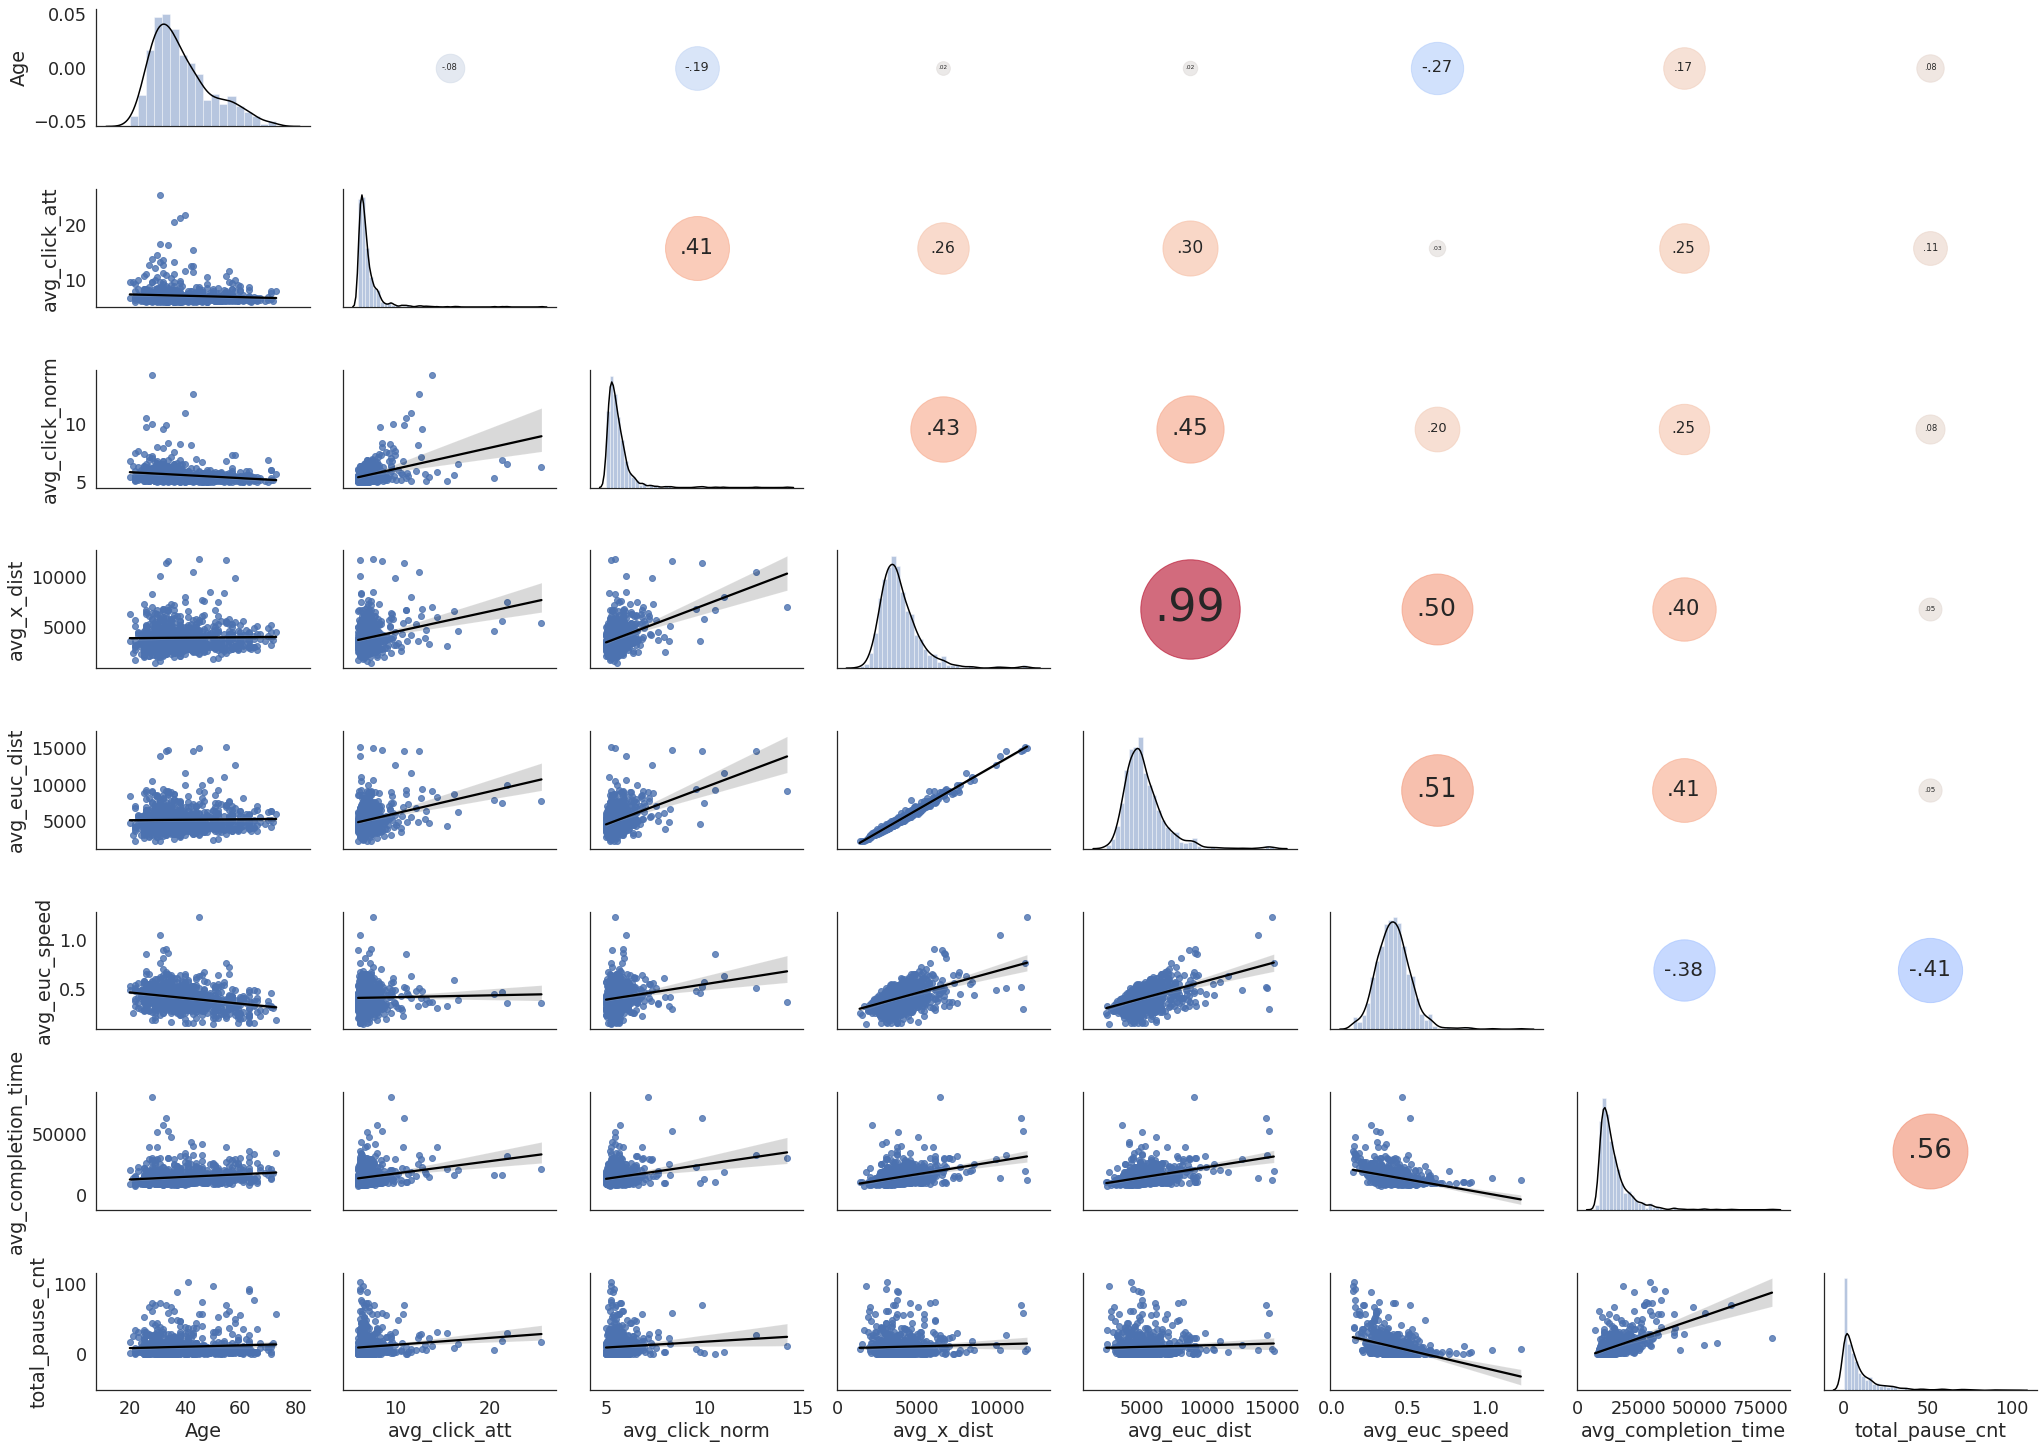

In [207]:
#what about age and mouse movement?

plot_p_corr(df_final, 'Age')

In [208]:
def find_corr_table_age (data):
    final = {}
    for y in ['Age']:
        final[y] = {}
        for x in ['reclick_percent_att','reclick_percent_norm', 
                  'avg_completion_time','avg_x_dist', 
                  'avg_euc_speed','total_pause_cnt']:
            res = scipy.stats.pearsonr(data[y], data[x])
            final[y][x]=('corr', round(res[0],5), 'p', round(res[1],5))
    return pd.DataFrame(final)

find_corr_table_age(df_final)

,Age
avg_completion_time,"(corr, 0.17278, p, 0.0)"
avg_euc_speed,"(corr, -0.27353, p, 0.0)"
avg_x_dist,"(corr, 0.01875, p, 0.59208)"
reclick_percent_att,"(corr, -0.08602, p, 0.0138)"
reclick_percent_norm,"(corr, -0.24991, p, 0.0)"
total_pause_cnt,"(corr, 0.07506, p, 0.03174)"


Almost everything is significant except for average horizontal distance moved. Strongest correlation is between Age and average cursor movement euclidean speed (negatively correlated). Average completion time is positively correlated with age, and reclick percentages are negatively correlated with age. These results make sense intuitively in that elder participants might move slower, and that they might be less likely to make unnecessary clicks because more efforts are associated with each click. These results support the validity of this project.